In [1]:
from pymatgen.io.vasp import Poscar, Xdatcar
from pymatgen.symmetry.groups import SpaceGroup
from pymatgen import Structure, Lattice
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer
import numpy as np
import operator
from site_analysis import Atom, Analysis, ShortestDistanceSite, get_vertex_indices, AtomsTrajectory, SitesTrajectory
from collections import Counter
import tqdm

x1 = Xdatcar('1/XDATCAR')
x2 = Xdatcar('2/XDATCAR')
x3 = Xdatcar('3/XDATCAR')
x4 = Xdatcar('4/XDATCAR')
x5 = Xdatcar('5/XDATCAR')
structures = x1.structures + x2.structures + x3.structures + x4.structures + x5.structures

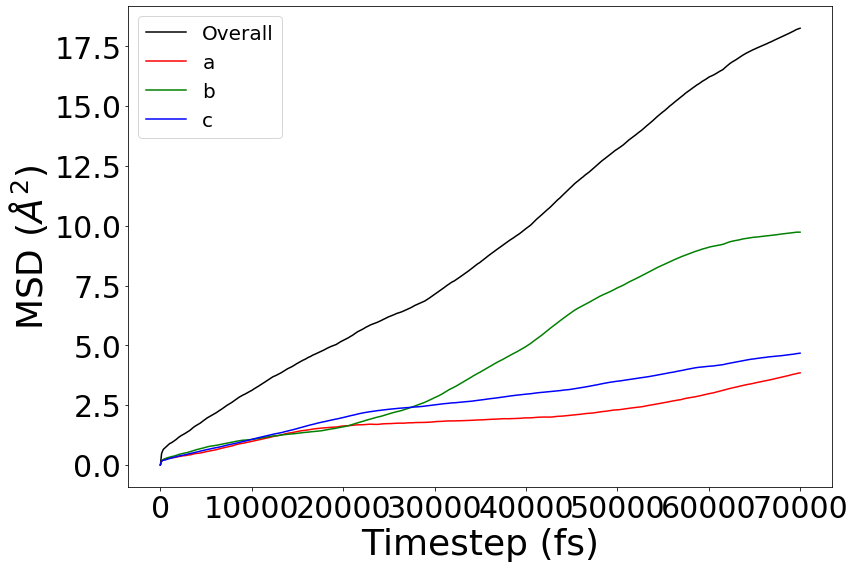

In [5]:
analyzer = DiffusionAnalyzer.from_structures(structures=structures, specie="Na", temperature=700.0, time_step=2, step_skip=5,
                                             smoothed="constant", avg_nsteps=3000)
plot = analyzer.get_msd_plot()
analyzer.diffusivity
plot.savefig('msd_plot_const_3000.png', dpi=300)

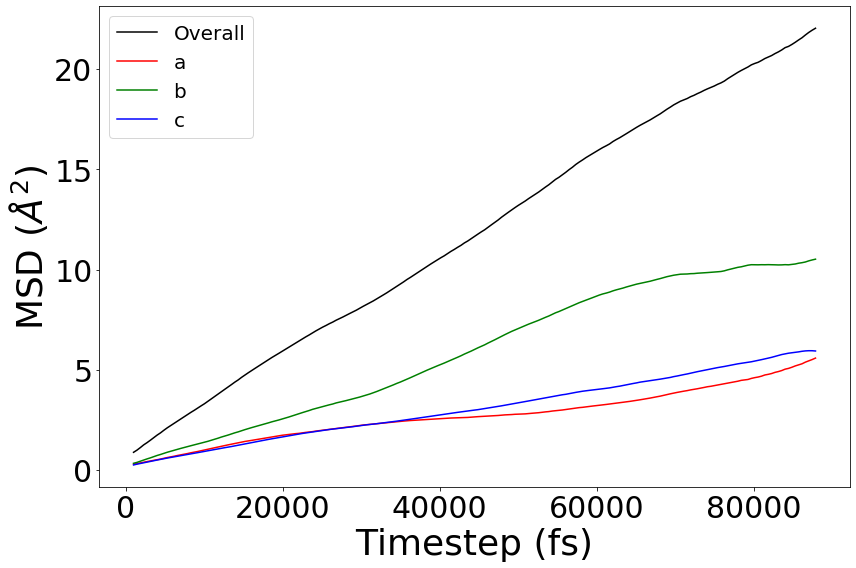

In [3]:
analyzer = DiffusionAnalyzer.from_structures(structures=structures, specie="Na", temperature=700.0, time_step=2, step_skip=5, smoothed="max", min_obs=100)
plot = analyzer.get_msd_plot()
analyzer.diffusivity
plot.savefig('msd_plot_max.png', dpi=300)

<module 'matplotlib.pyplot' from '/Users/mvc28/anaconda3/envs/nasscon/lib/python3.7/site-packages/matplotlib/pyplot.py'>

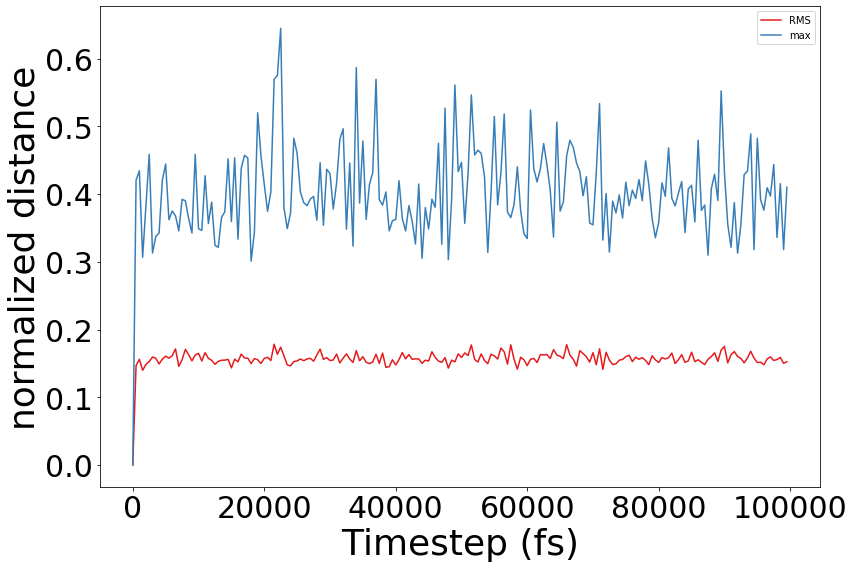

In [21]:
analyzer.get_framework_rms_plot()

In [22]:
analyzer.get_summary_dict()

{'D': 4.126011733362061e-06,
 'D_sigma': 4.95300907417096e-11,
 'D_charge': 3.511582375611184e-06,
 'D_charge_sigma': 1.3999676733859824e-09,
 'S': 203.02000255983705,
 'S_sigma': 0.0024371232558219333,
 'S_charge': 172.78706628997892,
 'D_components': [2.6429257171670787e-06,
  6.5265490548335604e-06,
  3.2085604280855432e-06],
 'S_components': [130.04490063034808, 321.1382059593721, 157.87690108979092],
 'D_components_sigma': [1.8194373866876128e-10,
  2.4886496303384664e-10,
  6.564127389032873e-11],
 'S_components_sigma': [0.008952523811700192,
  0.012245376091312177,
  0.0032298724420704627],
 'specie': 'Na',
 'step_skip': 5,
 'time_step': 2,
 'temperature': 700.0,
 'max_framework_displacement': 4.46364411130146,
 'Haven_ratio': 1.1749722182279538}